In [1]:
from __future__ import print_function
import os
os.chdir(os.path.join(os.environ["RNB_PLANNING_DIR"], 'src'))

## init stereo aruco detector scene builder

In [2]:
from pkg.detector.aruco.marker_config import *
from pkg.detector.aruco.stereo import ArucoStereo
from pkg.detector.camera.realsense import RealSense
from pkg.detector.camera.kinect import Kinect
from pkg.geometry.builder.scene_builder import SceneBuilder

s_builder = SceneBuilder(None)
# s_builder.reset_reference_coord(ref_name="floor")

In [3]:
from pkg.planning.filtering.reach_filter import ReachTrainer
from pkg.controller.combined_robot import *

In [4]:
rtrain = ReachTrainer(scene_builder=s_builder)

## collect and train

connection command:
indy0: False
Unable to register with master node [http://localhost:11311]: master may not be running yet. Will keep trying.
added robot collision boundaries
0 / 20000 (0 / 10757341 s): current success ratio = 0.0
100 / 20000 (29 / 5885 s): current success ratio = 0.49504950495
200 / 20000 (56 / 5604 s): current success ratio = 0.522388059701
300 / 20000 (86 / 5766 s): current success ratio = 0.504983388704
400 / 20000 (113 / 5680 s): current success ratio = 0.513715710723
500 / 20000 (141 / 5650 s): current success ratio = 0.516966067864
600 / 20000 (165 / 5517 s): current success ratio = 0.53078202995
700 / 20000 (196 / 5605 s): current success ratio = 0.522111269615
800 / 20000 (227 / 5696 s): current success ratio = 0.513108614232
900 / 20000 (257 / 5713 s): current success ratio = 0.511653718091
1000 / 20000 (284 / 5696 s): current success ratio = 0.513486513487
1100 / 20000 (316 / 5745 s): current success ratio = 0.508628519528
1200 / 20000 (348 / 5800 s): curr

11700 / 20000 (3415 / 5837 s): current success ratio = 0.498675326895
11800 / 20000 (3441 / 5833 s): current success ratio = 0.499110244895
11900 / 20000 (3474 / 5839 s): current success ratio = 0.498445508781
12000 / 20000 (3505 / 5842 s): current success ratio = 0.498208482626
12100 / 20000 (3531 / 5837 s): current success ratio = 0.498636476324
12200 / 20000 (3561 / 5837 s): current success ratio = 0.498647651832
12300 / 20000 (3593 / 5843 s): current success ratio = 0.498089586213
12400 / 20000 (3628 / 5851 s): current success ratio = 0.497217966293
12500 / 20000 (3657 / 5851 s): current success ratio = 0.497240220782
12600 / 20000 (3689 / 5856 s): current success ratio = 0.496785969368
12700 / 20000 (3719 / 5856 s): current success ratio = 0.496732540745
12800 / 20000 (3750 / 5859 s): current success ratio = 0.496445590188
12900 / 20000 (3779 / 5859 s): current success ratio = 0.496395628246
13000 / 20000 (3809 / 5860 s): current success ratio = 0.49634643489
13100 / 20000 (3837 /

3600 / 5000 (1036 / 1440 s): current success ratio = 0.506248264371
3700 / 5000 (1063 / 1437 s): current success ratio = 0.50743042421
3800 / 5000 (1095 / 1440 s): current success ratio = 0.50591949487
3900 / 5000 (1125 / 1442 s): current success ratio = 0.505255062804
4000 / 5000 (1156 / 1445 s): current success ratio = 0.503874031492
4100 / 5000 (1185 / 1445 s): current success ratio = 0.504023408925
4200 / 5000 (1215 / 1447 s): current success ratio = 0.50321352059
4300 / 5000 (1247 / 1450 s): current success ratio = 0.501976284585
4400 / 5000 (1275 / 1449 s): current success ratio = 0.502385821404
4500 / 5000 (1304 / 1448 s): current success ratio = 0.50255498778
4600 / 5000 (1336 / 1452 s): current success ratio = 0.501195392306
4700 / 5000 (1366 / 1453 s): current success ratio = 0.500744522442
4800 / 5000 (1392 / 1450 s): current success ratio = 0.501978754426
4900 / 5000 (1423 / 1452 s): current success ratio = 0.501122219955
trainset: 	606.1 ms/1 = 606.1 ms (606.104/606.104)
t

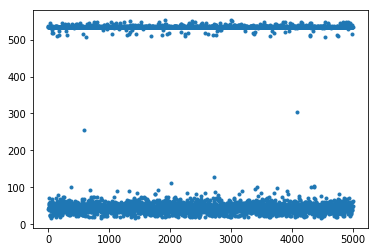

In [5]:
rtrain.collect_and_learn(RobotType.indy7gripper, "indy0_tcp", 
                         TRAIN_COUNT=20000, TEST_COUNT=5000, save_data=True, save_model=True, timeout=0.5)
import matplotlib.pyplot as plt
plt.plot(rtrain.time_plan, '.')

In [ ]:
rtrain.collect_and_learn(RobotType.panda, "panda0_hand", 
                         TRAIN_COUNT=20000, TEST_COUNT=5000, save_data=True, save_model=True, timeout=1)
import matplotlib.pyplot as plt
plt.plot(rtrain.time_plan, '.')

## load and train

In [6]:
C_svm_list = [64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
test_indy_list = []
# test_panda_list = []
for C_svm in C_svm_list:
    test_indy = rtrain.load_and_learn(RobotType.indy7gripper, C_svm=C_svm)
#     test_panda = rtrain.load_and_learn(RobotType.panda, C_svm=C_svm)
    test_indy_list.append(test_indy)
#     test_panda_list.append(test_panda)

trainset: 	1045.8 ms/1 = 1045.8 ms (1045.793/1045.793)
testset: 	261.5 ms/1 = 261.5 ms (261.452/261.452)

trainning accuracy = 98.23 %
test accuracy = 97.58 %
trainning success accuracy = 98.75 %
trainning failure accuracy = 97.73 %
test success accuracy = 98.24 %
test failure accuracy = 96.92 %
trainset: 	901.6 ms/1 = 901.6 ms (901.6/901.6)
testset: 	225.8 ms/1 = 225.8 ms (225.828/225.828)

trainning accuracy = 98.46 %
test accuracy = 97.58 %
trainning success accuracy = 98.9 %
trainning failure accuracy = 98.03 %
test success accuracy = 98.0 %
test failure accuracy = 97.16 %
trainset: 	784.6 ms/1 = 784.6 ms (784.554/784.554)
testset: 	196.6 ms/1 = 196.6 ms (196.645/196.645)

trainning accuracy = 98.65 %
test accuracy = 97.56 %
trainning success accuracy = 98.96 %
trainning failure accuracy = 98.35 %
test success accuracy = 97.8 %
test failure accuracy = 97.32 %
trainset: 	686.4 ms/1 = 686.4 ms (686.374/686.374)
testset: 	171.7 ms/1 = 171.7 ms (171.719/171.719)

trainning accuracy = 9

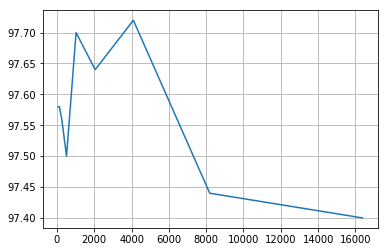

In [7]:
import matplotlib.pyplot as plt
plt.plot(C_svm_list, test_indy_list)
# plt.plot(C_svm_list, test_panda_list)
plt.grid()

In [8]:
rtrain.load_and_learn(RobotType.indy7gripper, C_svm=4000)
# rtrain.load_and_learn(RobotType.panda, C_svm=1000)

trainset: 	478.2 ms/1 = 478.2 ms (478.206/478.206)
testset: 	119.7 ms/1 = 119.7 ms (119.657/119.657)

trainning accuracy = 99.52 %
test accuracy = 97.72 %
trainning success accuracy = 99.62 %
trainning failure accuracy = 99.43 %
test success accuracy = 97.8 %
test failure accuracy = 97.64 %


97.72

## load and test

In [9]:
rtrain.load_and_test(RobotType.indy7gripper)

trainset: 	478.6 ms/1 = 478.6 ms (478.609/478.609)
testset: 	119.9 ms/1 = 119.9 ms (119.922/119.922)

trainning accuracy = 99.52 %
test accuracy = 97.72 %
trainning success accuracy = 99.62 %
trainning failure accuracy = 99.43 %
test success accuracy = 97.8 % (2443/2498)
test failure accuracy = 97.64 % (2443/2502)


97.72

In [ ]:
rtrain.load_and_test(RobotType.panda)

## Update label

In [ ]:
from pkg.planning.filtering.reach_filter import *

In [ ]:
ROBOT_TYPE = RobotType.indy7
TIP_LINK = "indy0_tcp"
TIMEOUT = 0.3
DATA_DIVS = ["train", "test"]
UPDATE_LABELS = [True] # to reduce feasible ones, as joint limit is reduced

In [ ]:
time_lists = []
for DATA_DIV in DATA_DIVS:
    rtrain.update_label(robot_type=ROBOT_TYPE, tip_link=TIP_LINK, data_div=DATA_DIV, update_labels=UPDATE_LABELS, timeout=TIMEOUT)
    time_lists.append(deepcopy(rtrain.time_list))
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(sorted(time_lists[0]), '.')
plt.subplot(1,2,2)
plt.plot(sorted(time_lists[0]), '.')

## Load and visualize

In [ ]:
ROBOT_TYPE = RobotType.panda
TIP_LINK = "panda0_hand"
TIMEOUT = 0.5
DATA_DIV = "test"

In [ ]:
rtrain.load_and_visualize(robot_type=ROBOT_TYPE, tip_link=TIP_LINK, data_div=DATA_DIV, timeout=TIMEOUT)